# Problem Statement

In [1]:
from warnings import filterwarnings #to ignore the warnings
filterwarnings("ignore")
import pandas as pd #for dataprocessing

# Reading Dataset

In [2]:
train = pd.read_csv("C:/Users/hp/Desktop/Python Classess/Regression Assignment/train_set.csv") 
test = pd.read_csv("C:/Users/hp/Desktop/Python Classess/Regression Assignment/testing_set.csv") 

In [3]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


# Missing Data Treatment

In [5]:
for col in ['Alley','FireplaceQu','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'GarageType','GarageFinish','GarageQual','GarageCond']:
     train[col].fillna('None', inplace= True)

In [6]:
#train.isna().sum()

In [7]:
for col in ['Alley','FireplaceQu','Fence','MiscFeature','PoolQC','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'GarageType','GarageFinish','GarageQual','GarageCond']:
     test[col].fillna('None', inplace= True)

In [8]:
#test.isna().sum()

In [9]:
from Customfunction import replacer
replacer(train)

In [10]:
#train.isna().sum()

In [11]:
replacer(test)

In [12]:
#test.isna().sum()

# Initial X and Y

In [13]:
Y = train[['SalePrice']]
X = train.drop(labels=["Id","SalePrice"],axis=1)

In [14]:
#Y.head(2)

In [15]:
Y.shape

(1460, 1)

In [16]:
#X.head(5)

In [17]:
X.shape

(1460, 79)

# Divide data in cat and con

In [18]:
cat = []
con = []
for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)

# Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

# Remove Outliers

In [20]:
outliers = []
for i in X1.columns:
    outliers.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))
import numpy as np
outliers = np.unique(outliers)


In [21]:
#outliers

In [22]:
X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [23]:
X.shape

(1021, 79)

In [24]:
Y.shape

(1021, 1)

In [25]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
10,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal


In [26]:
X.index = range(0,1021,1)

In [27]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
2,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
3,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
4,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal


In [28]:
Y.head()

,SalePrice
0,208500
2,223500
4,250000
6,307000
10,129500


In [29]:
Y.index= range(0,1021,1)

In [30]:
Y.head()

,SalePrice
0,208500
1,223500
2,250000
3,307000
4,129500


# EDA

In [31]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    from statsmodels.stats.anova import anova_lm
    from statsmodels.formula.api import ols
    model = ols(rel,train).fit()
    W= anova_lm(model)
    round(W.iloc[0,4],4)
    print(rel,"--->  ",round(W.iloc[0,4],4))

SalePrice ~ MSZoning --->   0.0
SalePrice ~ Street --->   0.117
SalePrice ~ Alley --->   0.0
SalePrice ~ LotShape --->   0.0
SalePrice ~ LandContour --->   0.0
SalePrice ~ Utilities --->   0.5847
SalePrice ~ LotConfig --->   0.0
SalePrice ~ LandSlope --->   0.1414
SalePrice ~ Neighborhood --->   0.0
SalePrice ~ Condition1 --->   0.0
SalePrice ~ Condition2 --->   0.0434
SalePrice ~ BldgType --->   0.0
SalePrice ~ HouseStyle --->   0.0
SalePrice ~ RoofStyle --->   0.0
SalePrice ~ RoofMatl --->   0.0
SalePrice ~ Exterior1st --->   0.0
SalePrice ~ Exterior2nd --->   0.0
SalePrice ~ MasVnrType --->   0.0
SalePrice ~ ExterQual --->   0.0
SalePrice ~ ExterCond --->   0.0
SalePrice ~ Foundation --->   0.0
SalePrice ~ BsmtQual --->   0.0
SalePrice ~ BsmtCond --->   0.0
SalePrice ~ BsmtExposure --->   0.0
SalePrice ~ BsmtFinType1 --->   0.0
SalePrice ~ BsmtFinType2 --->   0.0
SalePrice ~ Heating --->   0.0008
SalePrice ~ HeatingQC --->   0.0
SalePrice ~ CentralAir --->   0.0
SalePrice ~ Electric

In [32]:
#Removing those columns having higher pvalues>0.05
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")

In [33]:
train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [34]:
#Dropping the column based on correlation having less than

In [35]:
train= train.drop(labels=['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],axis=1)

In [36]:
#train.head()

# Preprocessing the data with OHE

In [37]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

In [38]:
#X1

In [39]:
#X2

In [40]:
Xnew = X1.join(X2)

In [41]:
Xnew.shape

(1021, 267)

In [42]:
Y.shape

(1021, 1)

# Split data into training and testing set

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Create Backward Elimination OLS Model

In [44]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.49
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.04e-292
Time:                        19:22:49   Log-Likelihood:                -9033.2
No. Observations:                 816   AIC:                         1.848e+04
Df Residuals:                     609   BIC:                         1.945e+04
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.476e+04   2314.551      6.377      0.000    1.02e+04    1.93e+04
MSSubClass            -4037.1669   7916.615     -0.510      0.610   -1.96e+04    1.15e+04
LotFrontage            -141.9179   1127.610     -0.126      0.900   -2356.393    2072.558
LotArea                5389.1691   1227.991      4.389      0.000    2977.559    7800.779
OverallQual            7260.3696   1583.379      4.585      0.000    4150.824    1.04e+04
OverallCond            5902.2908   1056.012      5.589      0.000    3828.423    7976.158
YearBuilt              1.164e+04   3039.443      3.828      0.000    5666.604    1.76e+04
YearRemodAdd           3052.8891   1441.364      2.118      0.035     222.241    5883.537
MasVnrArea             -355.4218   1261.440     -0.282      0.778   -2832.722    2121.879
BsmtFinSF1             6455.5019   1140.753      5.659      0.000    4215.215    8695.789
BsmtFinSF2             1251.3657   1529.488      0.818      0.414   -1752.345    4255.077
BsmtUnfSF               365.0046   1044.823      0.349      0.727   -1686.888    2416.897
TotalBsmtSF            7859.4061   1795.774      4.377      0.000    4332.745    1.14e+04
1stFlrSF               3915.2346   1881.544      2.081      0.038     220.132    7610.337
2ndFlrSF               1.305e+04   1937.840      6.736      0.000    9247.410    1.69e+04
LowQualFinSF           -112.3844    651.878     -0.172      0.863   -1392.585    1167.817
GrLivArea              1.523e+04   1497.959     10.164      0.000    1.23e+04    1.82e+04
BsmtFullBath            -43.8629   1129.974     -0.039      0.969   -2262.982    2175.256
BsmtHalfBath           9.049e-11   1.23e-10      0.735      0.463   -1.51e-10    3.32e-10
FullBath               -125.4669   1478.125     -0.085      0.932   -3028.309    2777.375
HalfBath                125.0514   1247.822      0.100      0.920   -2325.505    2575.608
BedroomAbvGr          -1116.8000   1245.932     -0.896      0.370   -3563.644    1330.044
KitchenAbvGr          -9.725e-11   1.16e-10     -0.838      0.403   -3.25e-10    1.31e-10
TotRmsAbvGrd            586.9154   1630.136      0.360      0.719   -2614.455    3788.286
Fireplaces              -86.2884   2015.343     -0.043      0.966   -4044.153    3871.576
GarageYrBlt           -1559.2819   1910.224     -0.816      0.415   -5310.708    2192.144
GarageCars             2917.1654   1880.726      1.551      0.121    -776.330    6610.661
GarageArea             3896.0608   1829.390      2.130      0.034     303.383    7488.739
WoodDeckSF             3315.1666    801.438      4.137      0.000    1741.249    4889.084
OpenPorchSF            1865.9858    856.734      2.178      0.030     183.473    3548.498
EnclosedPorch           441.8079    870.517      0.508      0.612   -1267.772    2151.388
3SsnPorch              

In [45]:
round(model.rsquared_adj,5)

0.92865

In [46]:
model.pvalues.sort_values().index

Index(['GrLivArea', 'Neighborhood_StoneBr', '2ndFlrSF', 'PoolQC_None', 'const',
       'BsmtExposure_Gd', 'BsmtFinSF1', 'OverallCond', 'OverallQual',
       'KitchenQual_Ex',
       ...
       'HouseStyle_1.5Fin', 'Foundation_CBlock', 'Functional_Min1',
       'RoofStyle_Hip', 'Fireplaces', 'BsmtFullBath', 'GarageCond_Gd',
       'Exterior1st_WdShing', 'SaleType_Oth', 'GarageQual_Po'],
      dtype='object', length=268)

# Model 2

In [47]:
model.pvalues.sort_values().index[-1]

'GarageQual_Po'

In [48]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [49]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92865

# Model 3

In [50]:
model.pvalues.sort_values().index[-1]

'SaleType_Oth'

In [51]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [52]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92865

# Model 4

In [53]:
model.pvalues.sort_values().index[-1]

'Exterior1st_WdShing'

In [54]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92865

# Model 5

In [55]:
model.pvalues.sort_values().index[-1]

'GarageCond_Gd'

In [56]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92865

# Model 6

In [57]:
model.pvalues.sort_values().index[-1]

'BsmtFullBath'

In [58]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92877

# Model 7

In [59]:
model.pvalues.sort_values().index[-1]

'Fireplaces'

In [60]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92888

# Model 8

In [61]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Hip'

In [62]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92888

# Model 9

In [63]:
model.pvalues.sort_values().index[-1]

'Functional_Min1'

In [64]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92888

# Model 10

In [65]:
model.pvalues.sort_values().index[-1]

'PoolArea'

In [66]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92888

# Model 11

In [67]:
model.pvalues.sort_values().index[-1]

'SaleType_COD'

In [68]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.929

# Model 12

In [69]:
model.pvalues.sort_values().index[-1]

'BsmtHalfBath'

In [70]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.929

# Model 13

In [71]:
model.pvalues.sort_values().index[-1]

'Foundation_CBlock'

In [72]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.929

# Model 14

In [73]:
model.pvalues.sort_values().index[-1]

'FullBath'

In [74]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92911

# Model 15

In [75]:
model.pvalues.sort_values().index[-1]

'HouseStyle_1.5Fin'

In [76]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92911

# Model 16

In [77]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_Unf'

In [78]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92911

# Model 17

In [79]:
model.pvalues.sort_values().index[-1]

'Exterior1st_MetalSd'

In [80]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92923

# Model 18

In [81]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Brk Cmn'

In [82]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92923

# Model 19

In [83]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_HdBoard'

In [84]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92934

# Model 20

In [85]:
model.pvalues.sort_values().index[-1]

'Foundation_Wood'

In [86]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92934

# Model 21

In [87]:
model.pvalues.sort_values().index[-1]

'GarageCond_TA'

In [88]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 22 

In [89]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Flat'

In [90]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 23

In [91]:
model.pvalues.sort_values().index[-1]

'Electrical_FuseP'

In [92]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 24

In [93]:
model.pvalues.sort_values().index[-1]

'KitchenAbvGr'

In [94]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 25

In [95]:
model.pvalues.sort_values().index[-1]

'Condition1_RRNe'

In [96]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 26

In [97]:
model.pvalues.sort_values().index[-1]

'RoofMatl_Tar&Grv'

In [98]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92946

# Model 27

In [99]:
model.pvalues.sort_values().index[-1]

'LotFrontage'

In [100]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92957

# Model 28

In [101]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_Rec'

In [102]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92957

# Model 29

In [103]:
model.pvalues.sort_values().index[-1]

'HalfBath'

In [104]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92968

# Model 30

In [105]:
model.pvalues.sort_values().index[-1]

'Foundation_Slab'

In [106]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92979

# Model 31 

In [107]:
model.pvalues.sort_values().index[-1]

'PavedDrive_P'

In [108]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92979

# Model 32

In [109]:
model.pvalues.sort_values().index[-1]

'Heating_GasW'

In [110]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92979

# Model 33

In [111]:
model.pvalues.sort_values().index[-1]

'MSZoning_RH'

In [112]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92979

# Model 34

In [113]:
model.pvalues.sort_values().index[-1]

'MasVnrType_BrkCmn'

In [114]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92979

# Model 35

In [115]:
model.pvalues.sort_values().index[-1]

'MasVnrType_None'

In [116]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92991

In [117]:
#Model 36

In [118]:
model.pvalues.sort_values().index[-1]

'Heating_Floor'

In [119]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92991

In [120]:
#Model 37

In [121]:
model.pvalues.sort_values().index[-1]

'Condition2_RRNn'

In [122]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92991

In [123]:
#Model 38

In [124]:
model.pvalues.sort_values().index[-1]

'LowQualFinSF'

In [125]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.92991

In [126]:
#Model 39

In [127]:
model.pvalues.sort_values().index[-1]

'GrLivArea'

In [128]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93002

In [530]:
#Model 40

In [130]:
model.pvalues.sort_values().index[-1]

'KitchenQual_Fa'

In [131]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93002

In [132]:
#Model 41

In [133]:
model.pvalues.sort_values().index[-1]

'KitchenQual_TA'

In [134]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93013

In [135]:
#model 42

In [136]:
model.pvalues.sort_values().index[-1]

'GarageType_Basment'

In [137]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93013

In [138]:
#model 43

In [139]:
model.pvalues.sort_values().index[-1]

'GarageType_Detchd'

In [140]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93024

In [141]:
#model 44

In [142]:
model.pvalues.sort_values().index[-1]

'GarageType_BuiltIn'

In [143]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93035

In [144]:
#model 45

In [145]:
model.pvalues.sort_values().index[-1]

'Neighborhood_SawyerW'

In [146]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93035

In [147]:
#model 46

In [148]:
model.pvalues.sort_values().index[-1]

'Condition2_Norm'

In [149]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93035

In [150]:
#model 47

In [151]:
model.pvalues.sort_values().index[-1]

'BldgType_Duplex'

In [152]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93035

In [153]:
#model 48

In [154]:
model.pvalues.sort_values().index[-1]

'BldgType_Twnhs'

In [155]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93046

In [156]:
#model 49

In [157]:
model.pvalues.sort_values().index[-1]

'MiscVal'

In [158]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93057

In [159]:
#model 50

In [160]:
model.pvalues.sort_values().index[-1]

'SaleCondition_Abnorml'

In [161]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93057

In [162]:
#model 51

In [163]:
model.pvalues.sort_values().index[-1]

'SaleCondition_Family'

In [164]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93068

In [165]:
#model 52

In [166]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Blueste'

In [167]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93078

In [168]:
#model 53

In [169]:
model.pvalues.sort_values().index[-1]

'Functional_Maj2'

In [170]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93089

In [171]:
#model 54

In [172]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_BLQ'

In [173]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93099

In [174]:
#model 55

In [175]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Gambrel'

In [176]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93109

In [177]:
#model 56

In [178]:
model.pvalues.sort_values().index[-1]

'Condition2_Feedr'

In [179]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93119

In [180]:
#Model 57

In [181]:
model.pvalues.sort_values().index[-1]

'LotConfig_FR2'

In [182]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93119

In [183]:
#Model 58

In [184]:
model.pvalues.sort_values().index[-1]

'MasVnrArea'

In [185]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93129

In [186]:
#Model 59

In [187]:
model.pvalues.sort_values().index[-1]

'BsmtUnfSF'

In [188]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93129

In [189]:
#Model 60

In [190]:
model.pvalues.sort_values().index[-1]

'MasVnrType_BrkFace'

In [191]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93139

In [192]:
#Model 61

In [193]:
model.pvalues.sort_values().index[-1]

'TotRmsAbvGrd'

In [194]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93148

In [195]:
#Model 62

In [196]:
model.pvalues.sort_values().index[-1]

'Neighborhood_BrkSide'

In [197]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93157

In [198]:
#Model 63

In [199]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Veenker'

In [200]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93167

In [201]:
#Model 64

In [202]:
model.pvalues.sort_values().index[-1]

'Neighborhood_IDOTRR'

In [203]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93177

In [204]:
#Model 65

In [205]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_BLQ'

In [206]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93186

In [207]:
#Model 66

In [208]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_ALQ'

In [209]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93195

In [210]:
#Model 67

In [211]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_Unf'

In [212]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93205

In [213]:
#Model 68

In [214]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLw'

In [215]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93214

In [216]:
#Model 69

In [217]:
model.pvalues.sort_values().index[-1]

'RoofMatl_WdShake'

In [218]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93223

In [219]:
#Model 70

In [220]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Wd Shng'

In [221]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93232

In [222]:
#Model 71

In [223]:
model.pvalues.sort_values().index[-1]

'Exterior1st_CBlock'

In [224]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93232

In [225]:
#Model 72

In [226]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_CBlock'

In [227]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93241

In [228]:
#Model 73

In [229]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Mansard'

In [230]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9325

In [231]:
#Model 74

In [232]:
model.pvalues.sort_values().index[-1]

'EnclosedPorch'

In [233]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93259

In [234]:
#Model 75

In [235]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_LwQ'

In [236]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93268

In [237]:
#Model 76

In [238]:
model.pvalues.sort_values().index[-1]

'ExterQual_Gd'

In [239]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93268

In [240]:
#Model 77

In [241]:
model.pvalues.sort_values().index[-1]

'BsmtFinSF2'

In [242]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93276

In [243]:
#Model 78

In [244]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_Rec'

In [245]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93284

In [246]:
#Model 79

In [247]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLI'

In [248]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93292

In [249]:
#Model 80

In [250]:
model.pvalues.sort_values().index[-1]

'BsmtCond_Fa'

In [251]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93292

In [252]:
#Model 81

In [253]:
model.pvalues.sort_values().index[-1]

'BsmtCond_Gd'

In [254]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93302

In [255]:
#Model 82

In [256]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLD'

In [257]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9331

In [258]:
#Model 83

In [259]:
model.pvalues.sort_values().index[-1]

'MSZoning_RL'

In [260]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93318

In [261]:
#Model 84

In [262]:
model.pvalues.sort_values().index[-1]

'MSZoning_RM'

In [263]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93328

In [264]:
#Model 85

In [265]:
model.pvalues.sort_values().index[-1]

'BldgType_2fmCon'

In [266]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93336

In [267]:
#Model 86

In [268]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_ImStucc'

In [269]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93343

In [270]:
#Model 87

In [271]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Plywood'

In [272]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93351

In [273]:
#Model 88

In [274]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_BrkFace'

In [275]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93359

In [276]:
#Model 89

In [277]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Stone'

In [278]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93367

In [279]:
#Model 90

In [280]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_AsbShng'

In [281]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93374

In [282]:
#Model 91

In [283]:
model.pvalues.sort_values().index[-1]

'Heating_GasA'

In [284]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93382

In [285]:
#Model 92

In [286]:
model.pvalues.sort_values().index[-1]

'Heating_Grav'

In [287]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93392

In [288]:
#Model 93

In [289]:
model.pvalues.sort_values().index[-1]

'MoSold'

In [290]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93399

In [291]:
#Model 94

In [292]:
model.pvalues.sort_values().index[-1]

'HouseStyle_SLvl'

In [293]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93405

In [294]:
#Model 95

In [295]:
model.pvalues.sort_values().index[-1]

'HouseStyle_SFoyer'

In [296]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93414

In [297]:
#Model 96

In [298]:
model.pvalues.sort_values().index[-1]

'MSSubClass'

In [299]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93423

In [300]:
#Model 97

In [301]:
model.pvalues.sort_values().index[-1]

'GarageQual_Ex'

In [302]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93423

In [303]:
#Model 98

In [304]:
model.pvalues.sort_values().index[-1]

'GarageQual_TA'

In [305]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93423

In [306]:
#Model 99

In [307]:
model.pvalues.sort_values().index[-1]

'GarageCond_Ex'

In [308]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93432

In [309]:
#Model 100

In [310]:
model.pvalues.sort_values().index[-1]

'Exterior1st_Stucco'

In [311]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93438

In [312]:
#Model 101

In [313]:
model.pvalues.sort_values().index[-1]

'Foundation_PConc'

In [314]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93444

In [315]:
#Model 102

In [316]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_ALQ'

In [317]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9345

In [318]:
#Model 103

In [319]:
model.pvalues.sort_values().index[-1]

'ExterQual_TA'

In [320]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93455

In [321]:
#Model 104

In [322]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_TA'

In [323]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93455

In [324]:
#Model 105

In [325]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_Gd'

In [326]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93464

In [327]:
#Model 106

In [328]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_Ex'

In [329]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9347

In [330]:
#Model 107

In [331]:
model.pvalues.sort_values().index[-1]

'GarageQual_Gd'

In [332]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93475

In [333]:
#Model 108

In [334]:
model.pvalues.sort_values().index[-1]

'Fence_GdPrv'

In [335]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93475

In [336]:
#Model 109

In [337]:
model.pvalues.sort_values().index[-1]

'Fence_GdWo'

In [338]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9348

In [339]:
#Model 110

In [340]:
model.pvalues.sort_values().index[-1]

'Fence_MnPrv'

In [341]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93486

In [342]:
#Model 111

In [343]:
model.pvalues.sort_values().index[-1]

'Fence_None'

In [344]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93493

In [345]:
#Model 112

In [346]:
model.pvalues.sort_values().index[-1]

'RoofMatl_WdShngl'

In [347]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93499

In [348]:
#Model 113

In [349]:
model.pvalues.sort_values().index[-1]

'LandContour_Low'

In [350]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93499

In [351]:
#Model 114

In [352]:
model.pvalues.sort_values().index[-1]

'Exterior1st_ImStucc'

In [353]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93503

In [354]:
#Model 115

In [355]:
model.pvalues.sort_values().index[-1]

'SaleType_Con'

In [356]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93507

In [357]:
#Model 116

In [358]:
model.pvalues.sort_values().index[-1]

'SaleType_WD'

In [359]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93513

In [360]:
#Model 117

In [361]:
model.pvalues.sort_values().index[-1]

'3SsnPorch'

In [362]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93517

In [363]:
#Model 118

In [364]:
model.pvalues.sort_values().index[-1]

'Condition1_RRAn'

In [365]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93517

In [366]:
#Model 119

In [367]:
model.pvalues.sort_values().index[-1]

'Condition1_Feedr'

In [368]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93526

In [369]:
#Model 120

In [370]:
model.pvalues.sort_values().index[-1]

'Condition1_RRNn'

In [371]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93532

In [372]:
#Model 121

In [373]:
model.pvalues.sort_values().index[-1]

'LotConfig_FR3'

In [374]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93537

In [375]:
#Model 122

In [376]:
model.pvalues.sort_values().index[-1]

'BldgType_TwnhsE'

In [377]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93541

In [378]:
#Model 123

In [379]:
model.pvalues.sort_values().index[-1]

'Functional_Maj1'

In [380]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93546

In [381]:
#Model 124

In [382]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Gable'

In [383]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9355

In [384]:
#Model 125

In [385]:
model.pvalues.sort_values().index[-1]

'BsmtExposure_No'

In [386]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9355

In [387]:
#Model 126

In [388]:
model.pvalues.sort_values().index[-1]

'BsmtExposure_Mn'

In [389]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93558

In [390]:
#Model 127

In [391]:
model.pvalues.sort_values().index[-1]

'BsmtQual_Fa'

In [392]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93558

In [393]:
#Model 128

In [394]:
model.pvalues.sort_values().index[-1]

'ExterCond_Fa'

In [395]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93558

In [396]:
#Model 129

In [397]:
model.pvalues.sort_values().index[-1]

'BedroomAbvGr'

In [398]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9356

In [399]:
#Model 130

In [400]:
model.pvalues.sort_values().index[-1]

'GarageYrBlt'

In [401]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93562

In [402]:
#Model 131

In [403]:
model.pvalues.sort_values().index[-1]

'GarageCond_Po'

In [404]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93564

In [405]:
#Model 132

In [406]:
model.pvalues.sort_values().index[-1]

'GarageQual_Fa'

In [407]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93567

In [408]:
#Model 133

In [409]:
model.pvalues.sort_values().index[-1]

'PavedDrive_Y'

In [410]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93569

In [411]:
#Model 134

In [412]:
model.pvalues.sort_values().index[-1]

'PavedDrive_N'

In [413]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93574

In [414]:
#Model 135

In [415]:
model.pvalues.sort_values().index[-1]

'Exterior1st_CemntBd'

In [416]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93576

In [417]:
#Model 136

In [418]:
model.pvalues.sort_values().index[-1]

'Functional_Min2'

In [419]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93579

In [420]:
#Model 137

In [421]:
model.pvalues.sort_values().index[-1]

'LandContour_Bnk'

In [422]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93583

In [423]:
#Model 138

In [424]:
model.pvalues.sort_values().index[-1]

'Neighborhood_SWISU'

In [425]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93587

In [426]:
#Model 139

In [427]:
model.pvalues.sort_values().index[-1]

'GarageType_CarPort'

In [428]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9359

In [429]:
#Model 140

In [430]:
model.pvalues.sort_values().index[-1]

'Exterior1st_VinylSd'

In [431]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93591

In [432]:
#Model 141

In [433]:
model.pvalues.sort_values().index[-1]

'Exterior1st_HdBoard'

In [434]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93594

In [435]:
#Model 142

In [436]:
model.pvalues.sort_values().index[-1]

'Exterior1st_Wd Sdng'

In [437]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.936

In [438]:
#Model 143

In [439]:
model.pvalues.sort_values().index[-1]

'Exterior1st_Plywood'

In [440]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93602

In [441]:
#Model 144

In [442]:
model.pvalues.sort_values().index[-1]

'LotShape_IR3'

In [443]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93602

In [444]:
#Model 145

In [445]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Sawyer'

In [446]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93601

In [447]:
#Model 146

In [448]:
model.pvalues.sort_values().index[-1]

'Neighborhood_CollgCr'

In [449]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93603

In [450]:
#Model 147

In [451]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Somerst'

In [452]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93608

In [453]:
#Model 148

In [454]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Timber'

In [455]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93614

In [456]:
#Model 149

In [457]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Gilbert'

In [458]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9362

In [459]:
#model 150

In [460]:
model.pvalues.sort_values().index[-1]

'Neighborhood_ClearCr'

In [461]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93621

In [462]:
#model 151

In [463]:
model.pvalues.sort_values().index[-1]

'Neighborhood_MeadowV'

In [464]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9362

In [465]:
#model 152

In [466]:
model.pvalues.sort_values().index[-1]

'Neighborhood_OldTown'

In [467]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9362

In [468]:
#model 153

In [469]:
model.pvalues.sort_values().index[-1]

'Neighborhood_NAmes'

In [470]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9362

In [471]:
#Model 154

In [472]:
model.pvalues.sort_values().index[-1]

'HeatingQC_Fa'

In [473]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.9362

In [474]:
#Model 155

In [475]:
model.pvalues.sort_values().index[-1]

'HeatingQC_TA'

In [476]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93628

In [477]:
#Model 156

In [478]:
model.pvalues.sort_values().index[-1]

'HeatingQC_Ex'

In [479]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93634

In [480]:
#Model 157

In [481]:
model.pvalues.sort_values().index[-1]

'Foundation_BrkTil'

In [482]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93634

In [483]:
#Model 158

In [484]:
model.pvalues.sort_values().index[-1]

'HouseStyle_2.5Unf'

In [485]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.93631

# Check for overfiiting

In [486]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

In [487]:
tr_err

254147888.92

In [488]:
ts_err

1.316205629231053e+29

# Regularize the data

# Create Tuning Grid and Ridge Model

In [489]:
tr=[]
ts=[]
w=[]
y=20
for i in range (0,2000,1):
    y=round(y+0.1,2)
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=y)
    model1 = rr.fit(xtrain,ytrain)
    tr_pred = model1.predict(xtrain) 
    ts_pred = model1.predict(xtest)
    tr_err1 = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err1 = round(mean_squared_error(ytest,ts_pred),2)
    w.append(y)
    tr.append(tr_err1)
    ts.append(ts_err1)

In [490]:
tr_err1

495522094.52

In [491]:
ts_err1

462339599.33

Text(0, 0.5, 'Loss')

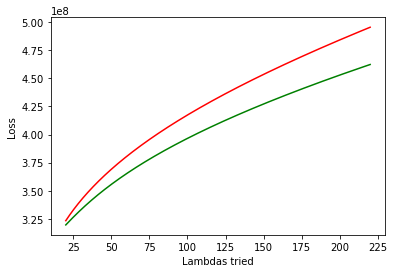

In [492]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")
plt.xlabel("Lambdas tried")
plt.ylabel("Loss")

# using the best value of Alpha created Ridge Model

In [493]:
rr = Ridge(alpha=21.05)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err1 = round(mean_squared_error(ytrain,tr_pred),2)
ts_err1 = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err1,ts_err1)

325229716.98 320869991.59


# Create Tuning Grid and Lasso Model

In [494]:
tr=[]
ts=[]
w= []
y=125.05
for i in range (0,2000,1):
    y=round(y+0.1,2)
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=y)
    model1 = rr.fit(xtrain,ytrain)
    tr_pred = model1.predict(xtrain) 
    ts_pred = model1.predict(xtest)
    tr_err2 = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err2 = round(mean_squared_error(ytest,ts_pred),2)
    w.append(y)
    tr.append(tr_err2)
    ts.append(ts_err2)

In [495]:
tr_err2

365586965.69

In [496]:
ts_err2

366652926.12

Text(0, 0.5, 'Loss')

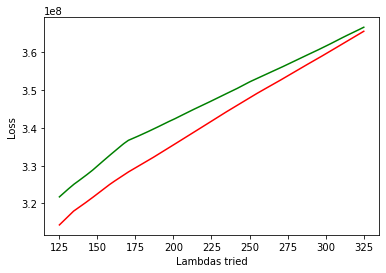

In [497]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")
plt.xlabel("Lambdas tried")
plt.ylabel("Loss")

# using the best value of Alpha created Lasso Model¶

In [498]:
rr = Lasso(alpha=125.08)
model1 = rr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain) 
ts_pred = model1.predict(xtest)
tr_err2 = round(mean_squared_error(ytrain,tr_pred),2)
ts_err2 = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err1,ts_err1)

325229716.98 320869991.59


# Test Set for Prediction

In [499]:
cols_to_keep = Xnew.columns

In [500]:
cols_to_keep

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageCars',
       ...
       'PoolQC_None', 'Fence_MnWw', 'MiscFeature_None', 'MiscFeature_Shed',
       'SaleType_CWD', 'SaleType_New', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=110)

In [501]:
Xnew.shape

(1021, 110)

In [502]:
test.shape

(1459, 80)

In [503]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [504]:
test_B = test.drop(labels=["Id"],axis=1)

In [505]:
test_B.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal


# Divide data in cat and con

In [506]:
cat_test = []
con_test = []
for i in test_B.columns:
    if(test_B[i].dtypes == "object"):
        cat_test.append(i)
    else:
        con_test.append(i)

In [507]:
len(con_test)

36

In [508]:
len(con)

36

In [509]:
#test = test.drop(labels=["Id"],axis=1)

In [510]:
test1=test_B[con]

In [511]:
test1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [512]:
Xtest1=pd.DataFrame(ss.transform(test1),columns=test1.columns)

In [513]:
Xtest2=pd.get_dummies(test[cat_test])

In [514]:
O = Xtest1.isna().sum()
O[O>0]

Series([], dtype: int64)

In [515]:
Xtest2.index

RangeIndex(start=0, stop=1459, step=1)

In [516]:
Xtest_new=Xtest1.join(Xtest2)

In [517]:
Xtest_new.shape

(1459, 284)

In [518]:
Xtest_new.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.841723,0.674791,0.674191,-0.819253,0.490629,-0.492064,-1.213911,-0.643521,0.123883,1.663686,...,0,0,0,1,0,0,0,0,1,0
1,-0.841723,0.729292,1.400432,-0.067719,0.490629,-0.595332,-1.358639,0.185789,1.241300,-0.246206,...,0,0,0,1,0,0,0,0,1,0


# Adding columns which is not present in Xtest_New

In [519]:
m=0
q=[]
for i in range(0,1459,1):
    m=0
    q.append(m)

In [520]:
Xtest_new['Exterior2nd_Other']=q

In [521]:
Xtest_final=Xtest_new[Xnew.columns]

In [522]:
Xnew.shape

(1021, 110)

In [523]:
Xtest_final.shape

(1459, 110)

In [524]:
P = Xtest_final.isna().sum()
P[P>0]


Series([], dtype: int64)

In [525]:
Xtest_final.head(2)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageCars,...,PoolQC_None,Fence_MnWw,MiscFeature_None,MiscFeature_Shed,SaleType_CWD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,0.674191,-0.819253,0.490629,-0.492064,-1.213911,0.123883,-0.372377,-0.623162,-0.794856,-1.061121,...,1,0,1,0,0,0,0,0,1,0
1,1.400432,-0.067719,0.490629,-0.595332,-1.358639,1.241300,0.848418,0.676015,-0.794856,-1.061121,...,1,0,0,0,0,0,0,0,1,0


In [526]:
pred=model.predict(Xtest_final)

In [527]:
pred

array([[121854.85766243],
       [174178.45808184],
       [196241.75129933],
       ...,
       [195984.32938549],
       [124146.348022  ],
       [224865.75117133]])

In [531]:
Xtest_final.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageCars,...,PoolQC_None,Fence_MnWw,MiscFeature_None,MiscFeature_Shed,SaleType_CWD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,0.674191,-0.819253,0.490629,-0.492064,-1.213911,0.123883,-0.372377,-0.623162,-0.794856,-1.061121,...,1,0,1,0,0,0,0,0,1,0
1,1.400432,-0.067719,0.490629,-0.595332,-1.358639,1.241300,0.848418,0.676015,-0.794856,-1.061121,...,1,0,0,0,0,0,0,0,1,0
2,1.280444,-0.819253,-0.527526,0.747149,0.571069,0.917126,-0.246747,-0.527149,0.919882,0.340437,...,1,0,1,0,0,0,0,0,1,0
3,0.222795,-0.067719,0.490629,0.781571,0.571069,0.452968,-0.252209,-0.533150,0.863621,0.340437,...,1,0,1,0,0,0,0,0,1,0
4,-1.142649,1.435348,-0.527526,0.575036,0.281613,-0.379569,0.714595,0.528995,-0.794856,0.340437,...,1,0,1,0,0,0,0,0,1,0


In [532]:
T = test[["Id"]]
T['SalePrice']=pred


In [533]:
T.head(5)

,Id,SalePrice
0,1461,121854.857662
1,1462,174178.458082
2,1463,196241.751299
3,1464,207433.057019
4,1465,191188.007128


In [534]:
T.to_csv("C:/Users/hp/Desktop/Python Classess/Regression Assignment/Submission.csv")